# Competition- Group 16

# Domain: Finance And Insurance

***Insurance Type:*** Travel Insurance

***Problem Statement:***
Design a model to predict the claim status.

***Contributors:*** Nidhin PS, Akarsh KB, Vishnu, Shartina Sunny, Anjali KG

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
data=pd.read_csv('travel insurance.csv')

In [2]:
data

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
5148,JZI,Airlines,Online,Basic Plan,No,15,MALAYSIA,18.0,6.30,M,52
5149,JZI,Airlines,Online,Basic Plan,No,17,MALAYSIA,22.0,7.70,F,43
5150,JZI,Airlines,Online,Basic Plan,No,2,INDIA,22.0,7.70,M,53
5151,JZI,Airlines,Online,Basic Plan,No,135,THAILAND,22.0,7.70,M,38


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153 entries, 0 to 5152
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                5153 non-null   object 
 1   Agency Type           5153 non-null   object 
 2   Distribution Channel  5153 non-null   object 
 3   Product Name          5153 non-null   object 
 4   Claim                 5153 non-null   object 
 5   Duration              5153 non-null   int64  
 6   Destination           5153 non-null   object 
 7   Net Sales             5153 non-null   float64
 8   Commision (in value)  5153 non-null   float64
 9   Gender                1083 non-null   object 
 10  Age                   5153 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 443.0+ KB


So, there are 4 numerical columns and 7 categorical columns

# FINDING MISSING VALUES

In [4]:
data.isnull().sum()

Agency                     0
Agency Type                0
Distribution Channel       0
Product Name               0
Claim                      0
Duration                   0
Destination                0
Net Sales                  0
Commision (in value)       0
Gender                  4070
Age                        0
dtype: int64

4070/5153 are null values, nearly 78.98% data in the column are null values
so,we are removing the gender column

In [5]:
ti=data=data.drop(['Gender'], axis = 1) 

In [6]:
data

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
5148,JZI,Airlines,Online,Basic Plan,No,15,MALAYSIA,18.0,6.30,52
5149,JZI,Airlines,Online,Basic Plan,No,17,MALAYSIA,22.0,7.70,43
5150,JZI,Airlines,Online,Basic Plan,No,2,INDIA,22.0,7.70,53
5151,JZI,Airlines,Online,Basic Plan,No,135,THAILAND,22.0,7.70,38


In [7]:
data.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [8]:
data.describe()

,Duration,Net Sales,Commision (in value),Age
count,5153.000000,5153.000000,5153.000000,5153.00000
mean,47.123617,36.133049,7.174892,40.21405
std,92.030163,41.804040,15.481226,14.46563
min,0.000000,-291.750000,0.000000,10.00000
25%,10.000000,18.000000,0.000000,36.00000
50%,24.000000,26.000000,0.000000,36.00000
75%,54.000000,44.000000,7.700000,42.00000
max,4881.000000,682.000000,184.140000,118.00000


In [9]:
data.describe(include='all')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
count,5153,5153,5153,5153,5153,5153.000000,5153,5153.000000,5153.000000,5153.00000
unique,12,2,2,15,2,NaN,91,NaN,NaN,NaN
top,EPX,Travel Agency,Online,Cancellation Plan,No,NaN,SINGAPORE,NaN,NaN,NaN
freq,3336,4037,5105,1856,5119,NaN,706,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,47.123617,NaN,36.133049,7.174892,40.21405
std,NaN,NaN,NaN,NaN,NaN,92.030163,NaN,41.804040,15.481226,14.46563
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-291.750000,0.000000,10.00000
25%,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,18.000000,0.000000,36.00000
50%,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,26.000000,0.000000,36.00000
75%,NaN,NaN,NaN,NaN,NaN,54.000000,NaN,44.000000,7.700000,42.00000


In [10]:
data.Claim.value_counts()

No     5119
Yes      34
Name: Claim, dtype: int64

# checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2581f3008e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2581f300fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2581f300580>],
 'medians': [<matplotlib.lines.Line2D at 0x2581f3566a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2581f356a00>],
 'means': []}

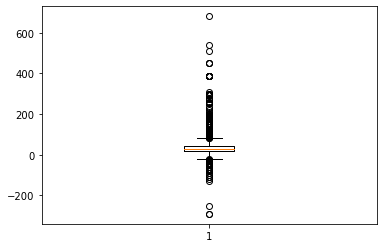

In [11]:
plt.boxplot(data['Net Sales'])

*** Outliers detected.Hence removing***


In [12]:
q11=np.percentile(data['Net Sales'],25,interpolation='midpoint')
q22=np.percentile(data['Net Sales'],50,interpolation='midpoint')
q33=np.percentile(data['Net Sales'],75,interpolation='midpoint')
iq = q33-q11
iq

26.0

In [13]:
low = q11-1.5*iq
low

-21.0

In [14]:
up=q33+iq*1.5
up

83.0

In [15]:
out=[]
for x in data['Net Sales']:
    if((x<low)or(x>up)):
        out.append(x)
len(out)

386

In [16]:
ind1=data['Net Sales']<low
data.loc[ind1].index


Int64Index([   0,    1,    2,    3,    5,    6,    7,    9,   10,   12,   13,
              14,   16,   17,   19,   20, 4719, 4720, 4721, 4722, 4723, 4724,
            4725, 4726, 4727, 4728, 4729, 4730, 4731, 4732, 4733, 4734, 4735,
            4736, 4737, 4738, 4739, 4740, 4741, 4742, 4745, 4746, 4747, 4748,
            4749, 4750, 4751, 4752, 4754],
           dtype='int64')

In [17]:
ind2=data['Net Sales']>up
data.loc[ind2].index

Int64Index([  23,   24,   25,   32,   44,  101,  104,  130,  140,  143,
            ...
            4947, 4953, 4955, 4958, 4970, 4976, 4977, 5008, 5129, 5130],
           dtype='int64', length=337)

In [18]:
data=data.drop(data.loc[ind1].index)
data=data.drop(data.loc[ind2].index)
ti=data.drop(data.loc[ind2].index)

In [19]:
data

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,44
11,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,-18.0,6.30,47
15,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,6,DENMARK,-19.8,11.88,53
18,JZI,Airlines,Online,Basic Plan,No,3,MALAYSIA,-18.0,6.30,47
...,...,...,...,...,...,...,...,...,...,...
5148,JZI,Airlines,Online,Basic Plan,No,15,MALAYSIA,18.0,6.30,52
5149,JZI,Airlines,Online,Basic Plan,No,17,MALAYSIA,22.0,7.70,43
5150,JZI,Airlines,Online,Basic Plan,No,2,INDIA,22.0,7.70,53
5151,JZI,Airlines,Online,Basic Plan,No,135,THAILAND,22.0,7.70,38


{'whiskers': [<matplotlib.lines.Line2D at 0x2581f437640>,
 'caps': [<matplotlib.lines.Line2D at 0x2581f437d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2581f4372e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2581f442400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2581f442760>],
 'means': []}

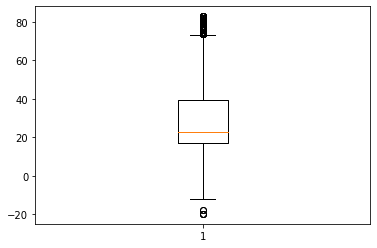

In [20]:
plt.boxplot(data['Net Sales'])

***Outliers are removed successfully***

In [21]:
data.shape

(4767, 10)

# ENCODING

In [22]:
from sklearn import preprocessing
pd.options.mode.chained_assignment = None
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][4], str):
            data[i] = encoder.fit_transform(data[i])

In [23]:
data.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Age'],
      dtype='object')

In [24]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
4,5,1,1,9,0,79,37,-19.8,11.88,41
8,5,1,1,9,0,57,76,-19.8,11.88,44
11,8,0,1,3,0,1,47,-18.0,6.30,47
15,5,1,1,9,0,6,19,-19.8,11.88,53
18,8,0,1,3,0,3,47,-18.0,6.30,47


# Feature Reduction

***Correlation matrix***

<AxesSubplot:>

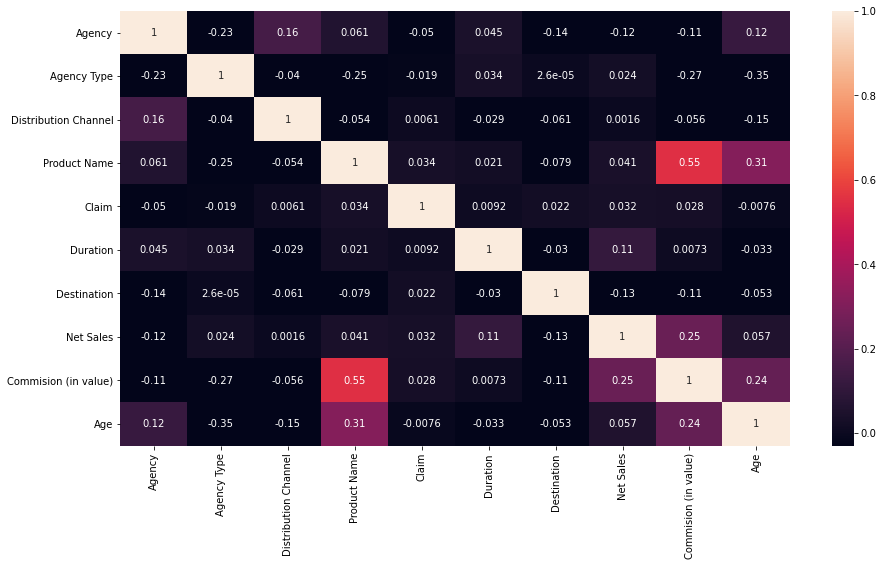

In [25]:
import seaborn as sns
corr=data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corr,vmin=-.03,vmax=1,annot=True)

Insights:

1.Here we clearly see that Commision and Product Name are corelated and distributions look same (linearlly distributed).

2.So we can drop any of the feature 'Commision' or 'Product Name'. So that it should not effect the Model.


In [26]:
data=data.drop(['Commision (in value)'], axis = 1)

In [27]:
data

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Age
4,5,1,1,9,0,79,37,-19.8,41
8,5,1,1,9,0,57,76,-19.8,44
11,8,0,1,3,0,1,47,-18.0,47
15,5,1,1,9,0,6,19,-19.8,53
18,8,0,1,3,0,3,47,-18.0,47
...,...,...,...,...,...,...,...,...,...
5148,8,0,1,3,0,15,47,18.0,52
5149,8,0,1,3,0,17,47,22.0,43
5150,8,0,1,3,0,2,33,22.0,53
5151,8,0,1,3,0,135,76,22.0,38


Features selection and recognizing the target

In [28]:
x=data.drop('Claim',axis=1)
y=data['Claim']
print(y)

4       0
8       0
11      0
15      0
18      0
       ..
5148    0
5149    0
5150    0
5151    0
5152    0
Name: Claim, Length: 4767, dtype: int32


In [29]:
y.value_counts()

0    4749
1      18
Name: Claim, dtype: int64

# Data Visualization

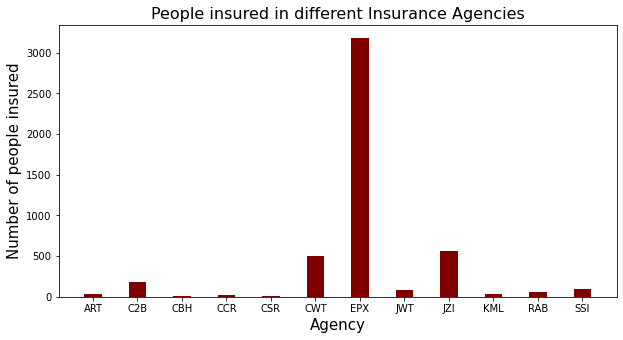

In [30]:
df2 = ti.groupby(by=["Agency"]).size().reset_index(name="counts")
fig = plt.figure(figsize = (10, 5))
plt.bar(df2['Agency'], df2['counts'], color ='maroon', width = 0.4)
plt.xlabel("Agency",fontsize=15)
plt.ylabel("Number of people insured",fontsize=15)
plt.title("People insured in different Insurance Agencies",fontsize=16)

plt.show()


Insight:
   
   The majority (69.9%)of people are insured under EPX agency.

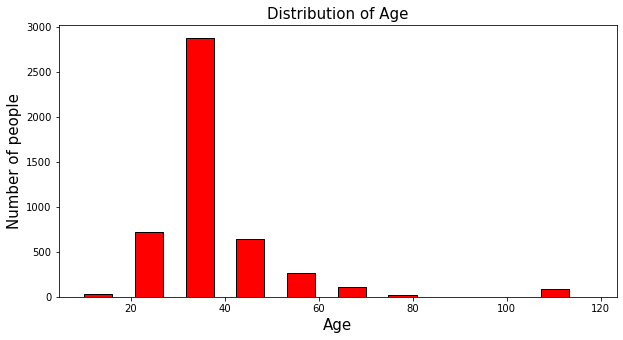

In [31]:
fig = plt.figure(figsize = (10, 5))
plt.hist(ti['Age'],color='r', edgecolor='black',width=6)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Number of people",fontsize=15)
plt.title("Distribution of Age",fontsize=15)
plt.show()

Insights:
    
The above figure shows a histogram depicting the distribution of age. 
From the graph, the majority of people opting for travel insurance are of the age 20 to 50

C:\Users\NIDHIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


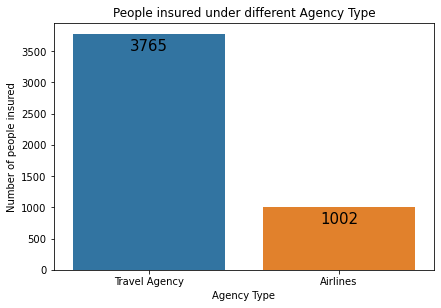

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
splot=sns.countplot(ti['Agency Type'])
plt.xlabel("Agency Type")
plt.ylabel("Number of people insured")
plt.title("People insured under different Agency Type")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

Insights:

78.9% of people have got their insurance through Travel Agency.

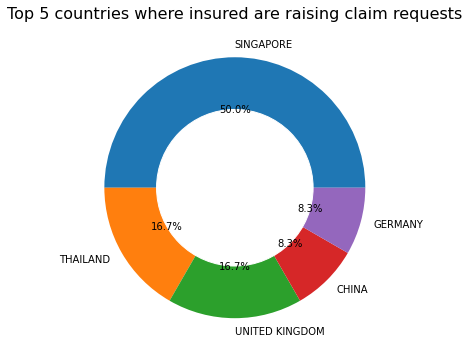

In [33]:
df6=ti.loc[ti['Claim']=='Yes']
df7= df6.groupby(by=["Destination"]).size().reset_index(name="counts")
df8=df7.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.figure(figsize = (10, 6))
plt.pie(df8['counts'], labels=df8['Destination'], autopct='%1.1f%%')
plt.title('Top 5 countries where insured are raising claim requests',fontsize=16)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Insights:

Singapore tops the list with maximum number of claim request filed.

Text(0.5, 1.0, 'Average Net Sales per agencies')

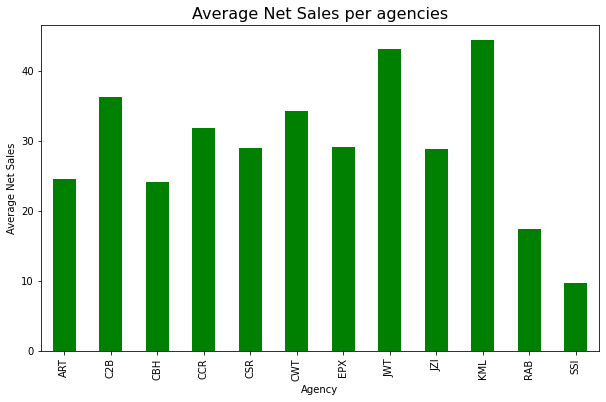

In [34]:
p=ti.groupby ('Agency')['Net Sales'].mean()
fig = plt.figure(figsize = (10, 6))
p.plot(kind='bar',color='green')
plt.ylabel('Average Net Sales')
plt.title("Average Net Sales per agencies",fontsize=16)

Insight:

The agency KML has the highest net sales while SSI has the least.


# Classification Model to Predict Claim

1.Logistic  regression

2.KNN

3.SVM

4.Randomforest Classifier

***1.Logistic  regression***

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)
x_train.shape

(3575, 8)

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
model=lr.fit(x_train,y_train)
pred=model.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print( classification_report(pred,y_test,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1191
           1       0.00      0.00      0.00         1

    accuracy                           0.99      1192
   macro avg       0.50      0.50      0.50      1192
weighted avg       1.00      0.99      1.00      1192



In [37]:
print('accuracy_score:',accuracy_score(pred,y_test))

accuracy_score: 0.9941275167785235


In [38]:
print(confusion_matrix(y_test,pred))

[[1185    1]
 [   6    0]]


In [39]:
y_test.value_counts()

0    1186
1       6
Name: Claim, dtype: int64

In [40]:
l=pd.DataFrame(pred)
l.value_counts()

0    1191
1       1
dtype: int64

***2.KNN***

In [41]:
from sklearn.neighbors import KNeighborsClassifier
value=[]
nbs=np.arange(3,15)
for k in nbs:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,pred)
    value.append(acc)
value

[0.9941275167785235,
 0.9941275167785235,
 0.9941275167785235,
 0.9941275167785235,
 0.9941275167785235,
 0.9941275167785235,
 0.9941275167785235,
 0.9941275167785235,
 0.9941275167785235,
 0.9941275167785235,
 0.9941275167785235,
 0.9941275167785235]

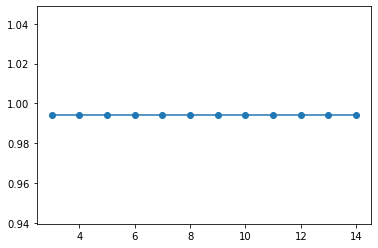

In [42]:
plt.plot(nbs,value,'o-')

In [43]:
classifier =KNeighborsClassifier(n_neighbors=7,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [44]:
print('accuracy_score:',accuracy_score(y_test,y_pred))

accuracy_score: 0.9949664429530202


***3.SVM***

In [45]:
from sklearn import svm
dtc=svm.SVC()
dtc.fit(x_train,y_train)
ypred=dtc.predict(x_test)
accuracy_score(y_test,ypred)

0.9949664429530202

In [46]:
print(classification_report(y_test,ypred,zero_division=0))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1186
           1       0.00      0.00      0.00         6

    accuracy                           0.99      1192
   macro avg       0.50      0.50      0.50      1192
weighted avg       0.99      0.99      0.99      1192



In [47]:
confusion_matrix(y_test,ypred)

array([[1186,    0],
       [   6,    0]], dtype=int64)

**SVM gives the best accuracy of 99.49% ***

***4.RandomForest Classifier***


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predy=rf.predict(x_test)
accuracy_score(y_test,predy)

0.9941275167785235

In [49]:
feature_imp = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100
feature_imp

Duration                37.280453
Net Sales               27.607670
Destination             14.473688
Age                     12.998900
Product Name             4.750582
Agency                   2.575028
Agency Type              0.311147
Distribution Channel     0.002534
dtype: float64

**we can see both Agency Type(0.669312)and Distribution Channel(0.001379) is having lesser feature importance.
Hence,we can drop them and check whether the  accuracy improves.**


In [50]:
x.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Age'],
      dtype='object')

In [51]:
data1=data.drop(['Agency Type', 'Distribution Channel'], axis = 1)

In [52]:
x=data1.drop('Claim',axis=1)
y=data1['Claim']
print(y)

4       0
8       0
11      0
15      0
18      0
       ..
5148    0
5149    0
5150    0
5151    0
5152    0
Name: Claim, Length: 4767, dtype: int32


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)
x_train.shape

(3575, 6)

In [54]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predy=rf.predict(x_test)
accuracy_score(y_test,predy)

0.9941275167785235

In [55]:
feature_imp = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100
feature_imp

Duration        38.710214
Net Sales       27.346075
Destination     13.787675
Age             13.250987
Product Name     5.090797
Agency           1.814253
dtype: float64

In [56]:
pred_y=rf.predict(x_test)
pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1186
           1       0.00      0.00      0.00         6

    accuracy                           0.99      1192
   macro avg       0.50      0.50      0.50      1192
weighted avg       0.99      0.99      0.99      1192



In [58]:
confusion_matrix(y_test,pred_y)

array([[1185,    1],
       [   6,    0]], dtype=int64)

In [59]:
rft=RandomForestClassifier(n_estimators=200,max_depth=20,random_state=42,criterion='entropy',n_jobs=5)
rft.fit(x_train,y_train)
print(accuracy_score(y_test,y_pred))

0.9949664429530202


***There is no change in the accuracy score even after tuning the model.***

# Conclusion:
   


**All the above classification models gives good accuracy score of value closer to 1 ,among which SVM gives the best.**